In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()
import numpy as np
import random as rand
from typing import *
from IPython.display import display, Markdown
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Some of my own code
def show_markdown_table(headers: List[str], data: List) -> str:
    s = f"| {' | '.join(headers)} |\n| {' | '.join([(max(1, len(header) - 1)) * '-' + ':' for header in headers])} |\n"
    for row in data:
        s += f"| {' | '.join([str(item) for item in row])} |\n"
    display(Markdown(s))

# Part 1

In [2]:
def mean(items):
    return round(sum(items) / len(items))

In [3]:
ids = [i for i in range(1,10001)]

## Generation of ages
tmp = np.random.normal(25, 1.6, 10000).tolist()
ages = [round(age) for age in tmp]

## Generation of income
tmp = np.random.normal(35000, 2500, 10000).tolist()
income = [round(income) for income in tmp]

In [4]:
mean(income)

34985

In [5]:
mean(ages)

25

In [6]:
data = {"id" : ids, "age" : ages, "income" : income}

In [7]:
df = pd.DataFrame(data)
df.set_index("id")

,age,income
id,,
1,23,35497
2,24,34982
3,26,36748
4,22,31694
5,25,33823
...,...,...
9996,25,39034
9997,23,35330
9998,27,37775


In [8]:
df.tail(3)

,id,age,income
9997,9998,27,37775
9998,9999,28,37418
9999,10000,26,37373


### Min, Max, Averages

In [9]:
df.min()

id            1
age          18
income    25585
dtype: int64

In [10]:
df.max()

id        10000
age          32
income    43874
dtype: int64

In [11]:
df.mean()

id         5000.5000
age          24.9807
income    34985.1029
dtype: float64

### Histograms

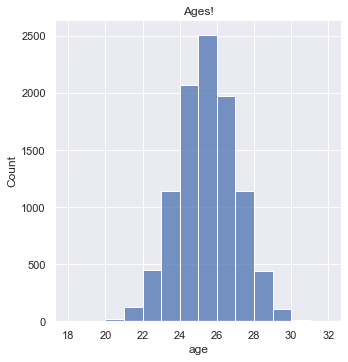

In [12]:
hist = sns.displot(
    data=df, 
    x="age", 
    kind="hist", 
    binwidth=1

).set(
    title="Ages!"
)

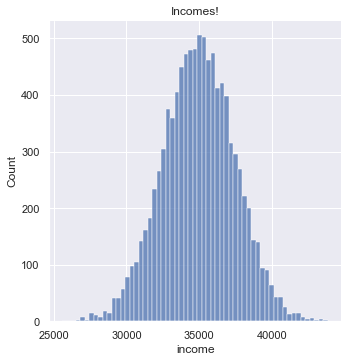

In [13]:
hist = sns.displot(
    data=df, 
    x="income", 
    kind="hist"
).set(
    title="Incomes!"
)

### Scatter plot

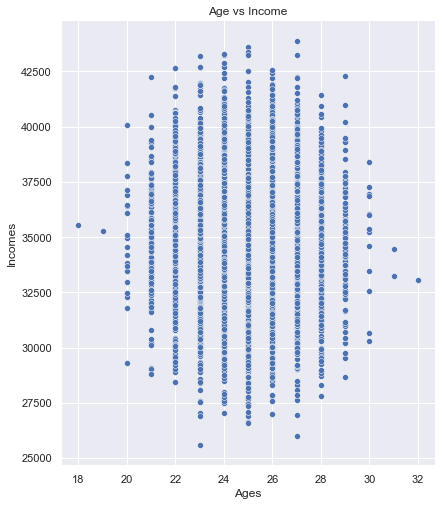

In [14]:
scatter = sns.relplot(
    data=df, 
    x="age", 
    y="income", 
    kind="scatter",
    height=7,
    aspect=0.9
).set(
    title="Age vs Income"
)
scatter.set_axis_labels("Ages", "Incomes")

In [15]:
sectors = ["jazz", "puck", "camp", "flub"]
df["sector"] = [rand.choice(sectors) for i in range(10000)]

In [16]:
df.sample(10)

,id,age,income,sector
7957,7958,21,34988,camp
2537,2538,29,39357,puck
2701,2702,26,36180,camp
9119,9120,23,34356,puck
1199,1200,25,39019,flub
835,836,24,32550,jazz
6638,6639,26,34161,camp
3905,3906,24,35905,jazz
1664,1665,29,36440,flub
4098,4099,23,35200,jazz


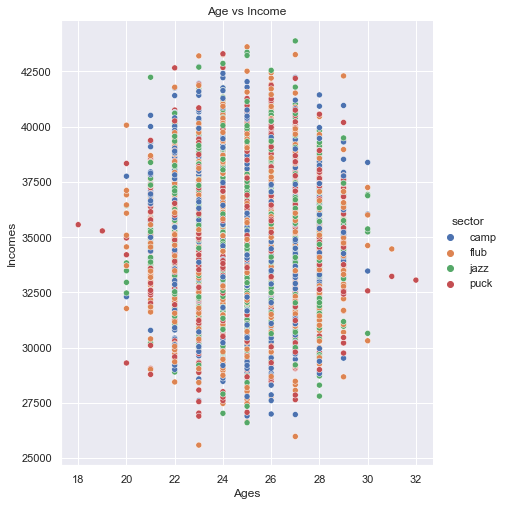

In [17]:
scatter = sns.relplot(
    data=df, 
    x="age", 
    y="income", 
    kind="scatter",
    height=7,
    aspect=0.9,
    hue="sector"
).set(
    title="Age vs Income"
)
scatter.set_axis_labels("Ages", "Incomes")

In [18]:
newdf = df.loc[df['income'] > 40000]

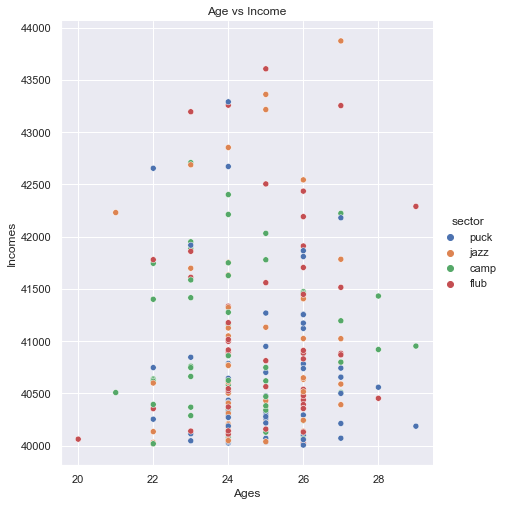

In [19]:
scatter = sns.relplot(
    data=newdf, 
    x="age", 
    y="income", 
    kind="scatter",
    height=7,
    aspect=0.9,
    hue="sector"
).set(
    title="Age vs Income"
)
scatter.set_axis_labels("Ages", "Incomes")

# Part 2

In [21]:
df = pd.read_csv("iris.csv")

In [22]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [23]:
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [24]:
df.value_counts("species")

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [29]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

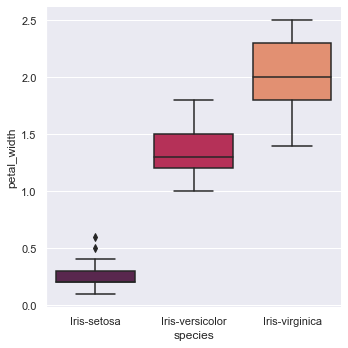

In [31]:
box = sns.catplot(
    data=df,
    kind="box",
    x="species",
    y="petal_width",
    palette="rocket",
)

### The largest differences here are that each iris species has a significant difference in petal lengths. Also that the Setosa species is much much smaller than the other two.

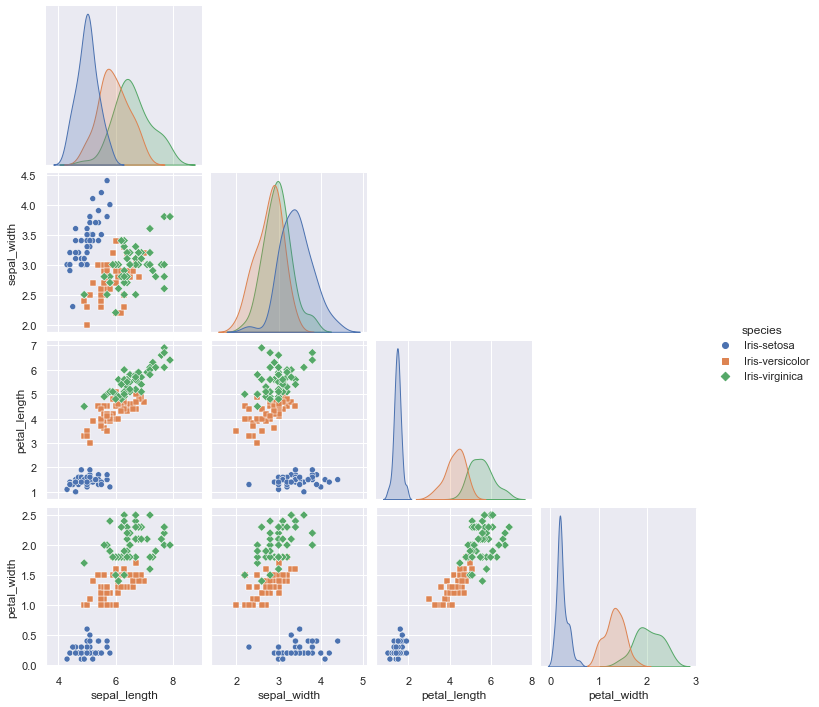

In [33]:
pair = sns.pairplot(
    data=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']],
    hue="species",
    markers=["o", "s", "D"],
    corner=True
)

# Sources

https://www.statology.org/generate-normal-distribution-python/

https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values